### Multiple Regression

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [4]:
"""The following code opens our modified dataset for model processing. We then convert the variables Year, Month, Wea into objective 
variables so the model can identify them as categorical"""

ocean = pd.read_csv('ocean17.csv', index_col=0)
ocean[['Wea','Year', 'Month']] = ocean[[ 'Wea','Year', 'Month']].astype('object')
ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   Depthm    2000 non-null   int64  
 2   T_degC    2000 non-null   float64
 3   O2ml_L    2000 non-null   float64
 4   STheta    2000 non-null   float64
 5   Year      2000 non-null   object 
 6   Month     2000 non-null   object 
 7   Lat_Dec   2000 non-null   float64
 8   Lon_Dec   2000 non-null   float64
 9   Bottom_D  2000 non-null   float64
 10  Wind_Dir  2000 non-null   float64
 11  Wea       2000 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 203.1+ KB


In [5]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96613/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96613/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96613/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,Depthm,T_degC,O2ml_L,STheta,Lat_Dec,Lon_Dec,Bottom_D,Wind_Dir,Year_2005,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,500,5.63,0.70,26.936,31.318333,-123.745000,3935.0,32.0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,200,9.25,2.08,26.415,33.418333,-117.901666,635.0,24.0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,250,8.72,1.75,26.528,33.418333,-117.901666,635.0,24.0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,300,8.50,1.20,26.621,33.418333,-117.901666,635.0,24.0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,400,7.81,0.70,26.759,33.418333,-117.901666,635.0,24.0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,250,8.03,1.45,26.573,36.053333,-122.018333,1339.0,26.0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,300,7.58,1.12,26.685,36.053333,-122.018333,1339.0,26.0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,400,6.95,0.72,26.794,36.053333,-122.018333,1339.0,26.0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,500,6.03,0.40,26.966,36.053333,-122.018333,1339.0,26.0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)


x = sm.add_constant(x)
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7808.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:58:40   Log-Likelihood:                 5970.8
No. Observations:                2000   AIC:                        -1.188e+04
Df Residuals:                    1969   BIC:                        -1.171e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6947      0.183     36.594      0.0

In [7]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]


meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.97
Mean Absolute Error: 0.007244085569183501
Mean Square Error: 0.0006193192419400862
Root Mean Square Error: 0.02488612549072447


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 5 k-fold validaton """

# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores 
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 99.59
Mean Absolute Error: 0.00614602349448436
Mean Squared Error: 7.448564606812542e-05
Root Mean Squared Error: 0.008630506709812896

Testing Set Performance:
R squared: 95.27
Mean Absolute Error: 0.00757311852901438
Mean Squared Error: 0.0007962303137566384
Root Mean Squared Error: 0.028217553291464487

Cross-Validation Scores:
R squared scores: [0.96814817 0.99518547 0.99512262 0.99583329 0.99485132]
Average R squared: 98.98
Mean Squared Error scores: [7.40155915e-04 7.09689395e-05 6.98298988e-05 8.26840608e-05
 9.48648932e-05]
Average Mean Squared Error: 0.0002


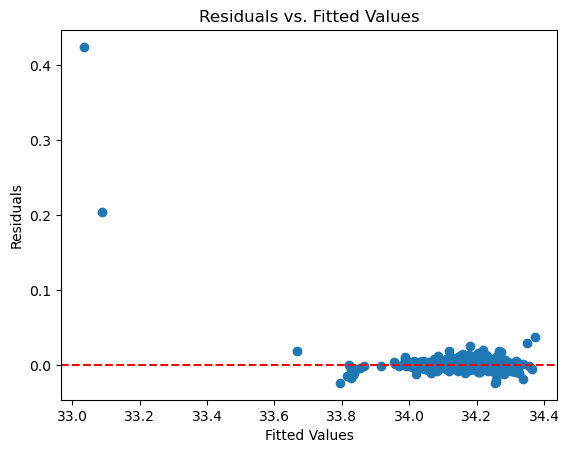

In [11]:
""" This code produces a Residuals vs. Fitted Values plot """
# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


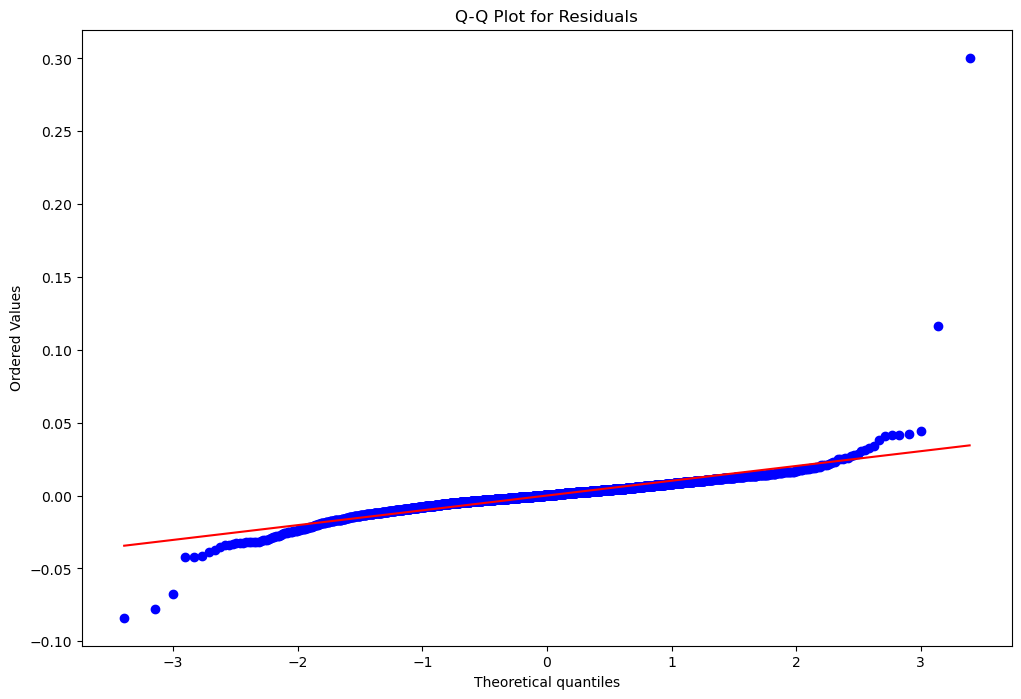

In [12]:
""" This code produces a Q-Q plot for Residuals """
residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


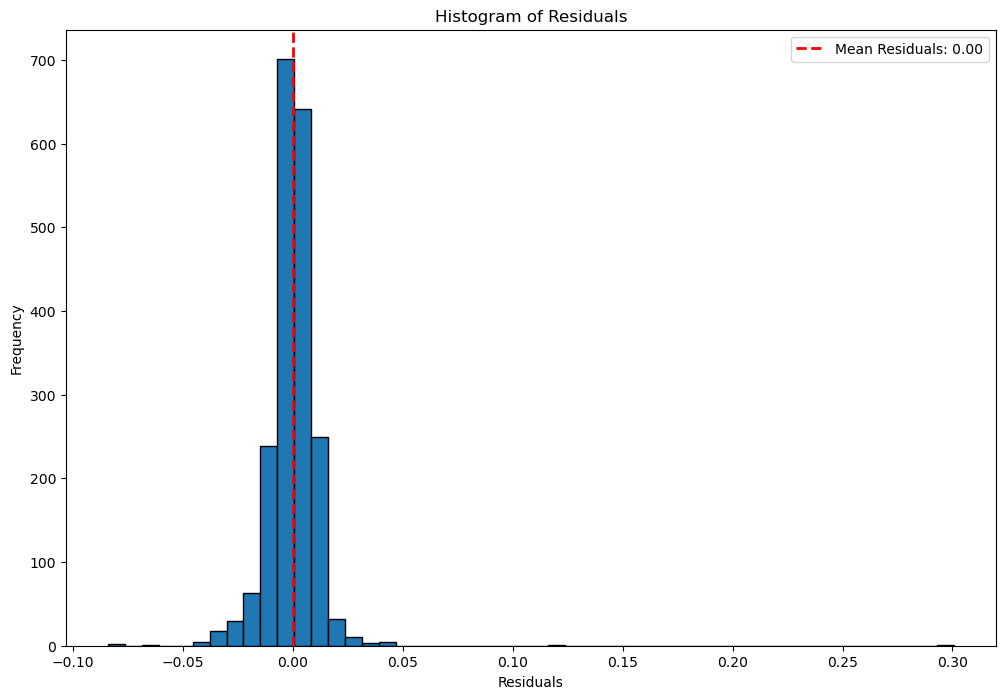

In [8]:
"Code creates a Histogram of residuals"

residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [9]:
""" Finding the Variance Inflation Factor values of the data"""
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable            VIF
0       const  482762.628948
1      Depthm       6.877151
2      T_degC      23.937494
3      O2ml_L      11.139994
4      STheta      36.873242
5     Lat_Dec       1.877841
6     Lon_Dec       4.006694
7    Bottom_D       4.073792
8    Wind_Dir       1.107761
9   Year_2005       3.332866
10  Year_2006       4.038195
11  Year_2007       3.509147
12  Year_2008       1.019861
13  Year_2009       1.089010
14  Year_2010       2.258761
15  Year_2011       1.776902
16  Year_2012       1.290861
17    Month_2       2.357288
18    Month_3       1.216905
19    Month_4       2.217298
20    Month_6       1.191931
21    Month_7       2.690454
22    Month_8       1.233618
23    Month_9       1.786410
24   Month_10       1.804402
25   Month_11       2.384070
26    Wea_1.0       2.650312
27    Wea_2.0       2.742547
28    Wea_3.0       1.030536
29    Wea_4.0       1.363885
30    Wea_6.0       1.082978
